### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Code starts here
train = pd.read_csv('train.csv')
train.drop('Id',1,inplace=True)
# Code ends here.

In [3]:
train

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10
...,...,...,...,...,...,...,...,...,...,...
8577,29,152.4878,13,955,4.1,0,3.7,10,3.0,13
8578,19,18.2878,0,119,0.0,5,0.0,17,0.0,6
8579,23,36.5878,6,76,4.2,2,4.5,12,3.4,15
8580,0,12.1878,3,119,4.5,2,5.0,4,4.5,13


In [4]:
random_key = 6
x = train.drop(['list_price'], axis = 1)
y = train['list_price']

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=random_key)


### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

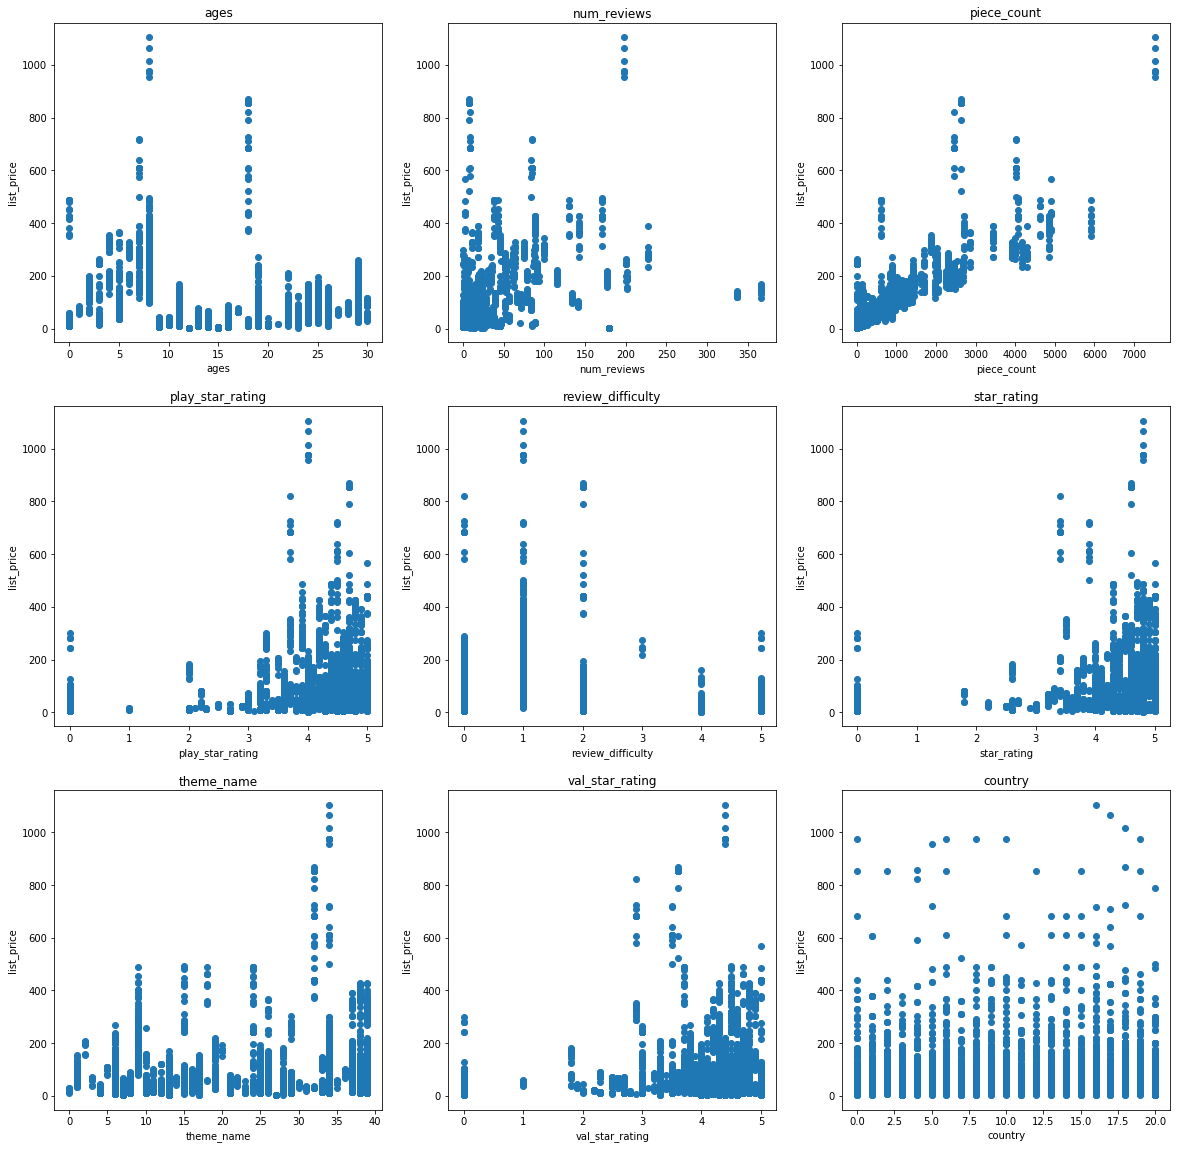

In [5]:
# Code starts here

cols = x_train.columns
fig, axes = plt.subplots(nrows =3, ncols=3, figsize=(20,20))

for i in range (0,3):
    for j in range (0,3):
        col = cols[i*3 +j]
        axes[i,j].set_title(col)
        axes[i,j].scatter(x_train[col],y_train)
        axes[i,j].set_xlabel(col)
        axes[i,j].set_ylabel('list_price')
        
plt.show()

# Code ends here.

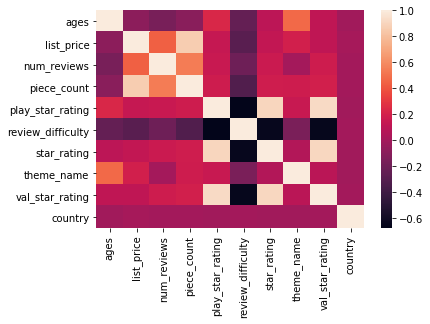

In [12]:
#Correlation of train data
sns.heatmap(train.corr())

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [6]:
# Code starts here
#corr = x_train.corr()

#x_train.drop(['val_star_rating','star_rating','country'], axis = 1, inplace = True)

#x_test.drop(['val_star_rating','star_rating','country'], axis = 1, inplace = True)
# Code ends here.

### Model building

In [7]:
# Code starts here
linreg = LinearRegression()

linreg.fit(x_train,y_train)

y_pred = linreg.predict(x_test)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))
# Code ends here.

41.57029390196533
0.7699605762362522


### Residual check!

- Check the distribution of the residual.

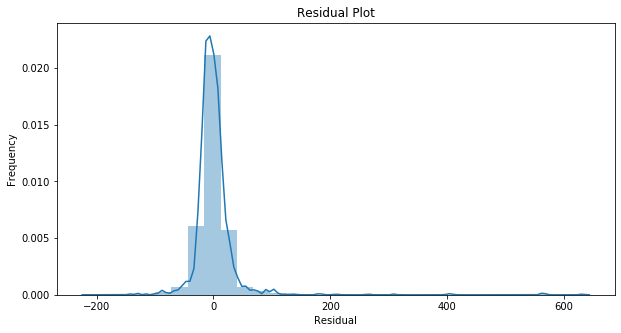

In [11]:
# Code starts here
residual = (y_test - y_pred)

plt.figure(figsize=(10,5))
sns.distplot(residual, bins=30)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Plot')
plt.show()
# Code ends here.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [9]:
# Code starts here
test = pd.read_csv('test.csv')
Id = test['Id']
test.drop('Id',axis=1, inplace = True)

pred = linreg.predict(test)

submission_file = pd.DataFrame({'Id' : Id, 'list_price' : pred})
submission_file.to_csv('submission.csv', index = False)
# Code ends here.

In [10]:
submission_file

,Id,list_price
0,9907,115.460758
1,5243,24.304907
2,8276,147.330774
3,6501,51.615217
4,1619,-11.255221
...,...,...
3674,2144,8.781887
3675,7242,63.128152
3676,11631,21.337049
3677,4639,24.649443
